In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
MLB=pd.read_excel("C:/Users/trent/OneDrive/Documents/Repositories/Team-Salary-Vs-Performance-Regression/data/MLB pay and performance.xlsx")

In [3]:
MLB.describe()

,season,salaries,wpc,G,W
count,918.000000,9.180000e+02,918.000000,918.000000,918.000000
mean,2000.978214,6.004263e+07,0.499844,159.932462,79.943355
std,9.135570,4.330992e+07,0.068669,8.675654,11.840224
min,1985.000000,8.800000e+05,0.265432,112.000000,43.000000
25%,1993.000000,2.543571e+07,0.450617,162.000000,71.250000
50%,2001.000000,5.053732e+07,0.500000,162.000000,80.000000
75%,2009.000000,8.441608e+07,0.549383,162.000000,89.000000
max,2016.000000,2.319789e+08,0.716049,164.000000,116.000000


In [4]:
MLB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   season    918 non-null    int64  
 1   Team      918 non-null    object 
 2   lgID      918 non-null    object 
 3   salaries  918 non-null    int64  
 4   wpc       918 non-null    float64
 5   G         918 non-null    int64  
 6   W         918 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 50.3+ KB


In [5]:
Sumsal = MLB.groupby(['season'])['salaries'].sum().reset_index().rename(columns={'salaries':'allsal'})
Sumsal

,season,allsal
0,1985,261964696
1,1986,307854518
2,1987,272575375
3,1988,300452424
4,1989,359995711
5,1990,443881193
6,1991,613048418
7,1992,805543323
8,1993,901740134
9,1994,927836287


In [6]:
MLB = pd.merge(MLB, Sumsal, on=['season'], how='left')
display(MLB)

,season,Team,lgID,salaries,wpc,G,W,allsal
0,1997,ANA,AL,31135472,0.518519,162,84,1127285885
1,1998,ANA,AL,41281000,0.524691,162,85,1278282871
2,1999,ANA,AL,55388166,0.432099,162,70,1494228750
3,2000,ANA,AL,51464167,0.506173,162,82,1666135102
4,2001,ANA,AL,47535167,0.462963,162,75,1960663313
...,...,...,...,...,...,...,...,...
913,2012,WAS,NL,80855143,0.604938,162,98,2932741192
914,2013,WAS,NL,113703270,0.530864,162,86,3034525648
915,2014,WAS,NL,131983680,0.592593,162,96,3192317623
916,2015,WAS,NL,155587472,0.512346,162,83,3514142569


In [7]:
MLB['relsal']= MLB['salaries']/MLB['allsal']

<Axes: xlabel='relsal', ylabel='wpc'>

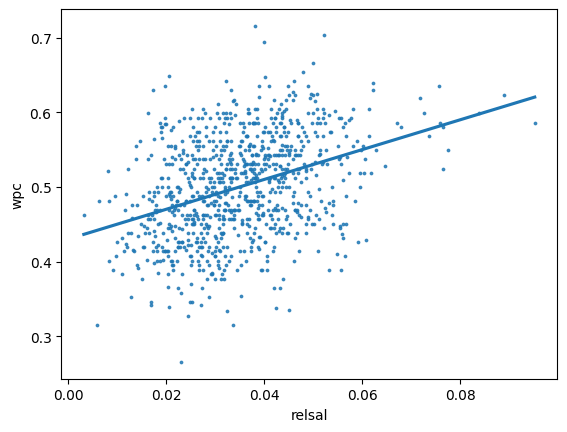

In [8]:
sns.regplot(x="relsal", y="wpc", data = MLB, scatter_kws={'s':3}, ci=False)

In [9]:
wpcsal1_lm = smf.ols(formula = 'wpc ~ relsal', data=MLB).fit()
print(wpcsal1_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    wpc   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     141.5
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           1.94e-30
Time:                        20:42:29   Log-Likelihood:                 1222.7
No. Observations:                 918   AIC:                            -2441.
Df Residuals:                     916   BIC:                            -2432.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4301      0.006     68.965      0.0

In [10]:
MLB.sort_values(by=['Team','season'], ascending=True)

,season,Team,lgID,salaries,wpc,G,W,allsal,relsal
0,1997,ANA,AL,31135472,0.518519,162,84,1127285885,0.027620
1,1998,ANA,AL,41281000,0.524691,162,85,1278282871,0.032294
2,1999,ANA,AL,55388166,0.432099,162,70,1494228750,0.037068
3,2000,ANA,AL,51464167,0.506173,162,82,1666135102,0.030888
4,2001,ANA,AL,47535167,0.462963,162,75,1960663313,0.024244
...,...,...,...,...,...,...,...,...,...
913,2012,WAS,NL,80855143,0.604938,162,98,2932741192,0.027570
914,2013,WAS,NL,113703270,0.530864,162,86,3034525648,0.037470
915,2014,WAS,NL,131983680,0.592593,162,96,3192317623,0.041344
916,2015,WAS,NL,155587472,0.512346,162,83,3514142569,0.044275


In [11]:
MLB['wpc_lag'] = MLB.groupby('Team')['wpc'].shift(1)
MLB

,season,Team,lgID,salaries,wpc,G,W,allsal,relsal,wpc_lag
0,1997,ANA,AL,31135472,0.518519,162,84,1127285885,0.027620,NaN
1,1998,ANA,AL,41281000,0.524691,162,85,1278282871,0.032294,0.518519
2,1999,ANA,AL,55388166,0.432099,162,70,1494228750,0.037068,0.524691
3,2000,ANA,AL,51464167,0.506173,162,82,1666135102,0.030888,0.432099
4,2001,ANA,AL,47535167,0.462963,162,75,1960663313,0.024244,0.506173
...,...,...,...,...,...,...,...,...,...,...
913,2012,WAS,NL,80855143,0.604938,162,98,2932741192,0.027570,0.496894
914,2013,WAS,NL,113703270,0.530864,162,86,3034525648,0.037470,0.604938
915,2014,WAS,NL,131983680,0.592593,162,96,3192317623,0.041344,0.530864
916,2015,WAS,NL,155587472,0.512346,162,83,3514142569,0.044275,0.592593


In [12]:
wpcsal2_lm = smf.ols(formula = 'wpc ~wpc_lag + relsal', data=MLB).fit()
print(wpcsal2_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    wpc   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     134.6
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           9.68e-52
Time:                        20:42:45   Log-Likelihood:                 1235.0
No. Observations:                 883   AIC:                            -2464.
Df Residuals:                     880   BIC:                            -2450.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2839      0.015     19.093      0.0

In [13]:
wpcsal3_lm = smf.ols(formula = 'wpc ~wpc_lag + relsal +C(Team)', data=MLB).fit()
print(wpcsal3_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    wpc   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     8.401
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           2.02e-36
Time:                        20:44:03   Log-Likelihood:                 1252.0
No. Observations:                 883   AIC:                            -2430.
Df Residuals:                     846   BIC:                            -2253.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3224      0.028     11.

In [ ]:
# Low (1%), Medium (3.5%) and High (6%) relative salary
print(1/(1-0.361)*(0.284 + 1.026*.01))
print(1/(1-0.361)*(0.284 + 1.026*.035))
print(1/(1-0.361)*(0.284 + 1.026*.06))

0.4605007824726134
0.500641627543036
0.5407824726134585
